----

# PROYECTO: SUPERMERCADO

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene valores ausentes y duplicados.

Debes completar tres pasos. Para cada escribir una breve introducción que refleje con claridad el planteamiento de solución general.

Las conclusiones finales deben resumir los hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos:

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Paso 1. Descripción de los datos

Leer los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`).

Verificar la información para cada DataFrame creado.


## Plan de solución

Abrir los archivos para ver que tipo de separadores tienen.

Importar las librerias y revisar en forma general su contenido.

Confirmar cuales son las variables que tienen en común, cuales son los campos llave y el tipo de datos que incluyen.

Tener una idea clara del volúmen de datos, de la existencia de datos nulos y tipo de datos.

Entender la lógica de los datos desde el punto de vista de negocio y establecer una primera apreciación general del tipo de análisis que se puede hacer de estos datos.



In [ ]:
# importar librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# leer conjuntos de datos en los DataFrames
df_orders = pd.read_csv('/content/instacart_orders.csv',sep=';')
df_order_products = pd.read_csv('/content/order_products.csv',sep=';')
df_products = pd.read_csv('/content/products.csv',sep=';')
df_aisles = pd.read_csv('/content/aisles.csv',sep=';')
df_departments = pd.read_csv('/content/departments.csv',sep=';')


In [ ]:
# mostrar información del DataFrame
df_orders.info(show_counts=True)
print()
df_orders.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
73820,2408170,72458,4,3,14,30.0
191017,1579781,110227,5,5,7,5.0
327430,727862,21572,7,1,9,10.0
423064,707889,74940,1,3,23,NaN
133735,449716,74764,26,2,15,3.0
246579,3377931,141825,35,0,8,9.0
389415,1703143,155414,16,4,8,6.0
345122,852301,85943,8,3,19,4.0
241981,1642650,29569,28,5,12,8.0
35599,336414,26343,11,0,16,21.0


OBSERVACIONES:

El separador ";" usado, importó correctamente los distintos campos.
No se tienen datos nulos.

Los campos que deben tener tipo "int64" lo tienen.

Debemos analizar con mas profundidad porque el campo days_since_prior_order se importó con tipo float64 y cambiarlo a int64 si es posible.

El campo llave es order_id. No debería estar duplicado.

**Tipo de analísis que podríamos hacer:**  No nos proporcionan información "absoluta" de fechas de compra de los pedidos, en su lugar tenemos información "relativa" a la hora en que se realizan las compras, el día de la semana, tiempo transcurrido desde la compra previa. Con estos datos el análisis se debe enfocar en encontrar en identificar grupos de compradores con patrones en común.
Sería interesante poder preguntar el periodo en el que se generaron los datos; parece que la variable days_since_prior_order nos puede dar una idea.

In [ ]:
# mostrar información del DataFrame
df_order_products.info(show_counts=True)
print()
df_order_products.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB



,order_id,product_id,add_to_cart_order,reordered
181405,2517437,913,9.0,0
3931285,1451606,27521,13.0,1
2361495,1532338,26346,13.0,0
4308183,3052782,29487,12.0,1
3594601,3095537,21903,9.0,1
3426813,1456151,21847,5.0,0
874482,2264250,13852,26.0,0
76902,3398946,38371,9.0,1
807461,1758038,37158,2.0,1
400472,414909,28836,1.0,1


OBSERVACIONES:

El separador ";" usado, importó correctamente los distintos campos.

Es un dataframe muy grande, que tiene mas de 4.5 mill de registros.

El campo add_to_cart_order tiene datos nulos que debemos revisar cual es su mejor tratamiento. El campo add_to_cart_order tiene tipo float64 lo cual parece irregular y debe investigarse con mas profundidad  y cambiarlo a int64 si es posible. El resto de los campos que deben tener tipo "int64" lo tienen correctamente.

No hay un campo llave único. Sin embargo la combinación de los campos order_id, product_id y add_to_cart_order no debería estar duplicada.

**Tipo de analísis que podríamos hacer:** No nos dan información de los ingresos en $. Con los datos provistos el análisis puede enfocarse en identificar los productos mas vendidos, menos vendidos. No viene un campo que indique el número de unidades compradas de un mismo producto en una misma orden, pero supongo que podríamos obtener este importante dato usando el campo add_to_cart_order. Adicionalmente, con el campo 'reordered' podríamos analizar qué tan abiertos estan los clientes a pedir nuevos productos.

In [ ]:
# mostrar información del DataFrame
df_products.info()
print()
df_products.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB



,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


OBSERVACIONES:

El separador ";" usado, importó correctamente los distintos campos.

El campo product_name tiene datos nulos que debemos revisar cual es su mejor tratamiento.

El campo product_name tiene tipo object lo cual parece correcto. El resto de los campos que deben tener tipo "int64" lo tienen correctamente.

El campo llave es product_id, no debería estar duplicado.

**Tipo de analísis que podríamos hacer:** Es un catálogo. No parece necesario hacer un análisis con esta información. Puede servir para complementar otros análisis.

In [ ]:
# mostrar información del DataFrame
df_aisles.info()
print()
df_aisles.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB



,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


OBSERVACIONES:

El separador ";" usado, importó correctamente los distintos campos. No se tienen datos nulos y el tipo de datos parece correcto.

**Tipo de analísis que podríamos hacer:** Es un catálogo. No parece necesario hacer un análisis con esta información. Puede servir para complementar otros análisis.

In [ ]:
# mostrar información del DataFrame
df_departments.info()
print()
df_departments.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes



,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


OBSERVACIONES:

El separador ";" usado, importó correctamente los distintos campos. No se tienen datos nulos y el tipo de datos parece correcto.

El campo llave es department_id, no debería estar duplicado.

**Tipo de analísis que podríamos hacer:** Es un catálogo. No parece necesario hacer un análisis con esta información. Puede servir para complementar otros análisis.

## Conclusiones PARTE 1

En forma general podemos decir que los datos parecen tener buena calidad, siendo necesario sólo algunos procesos de preparación:
1. Ajustar el tipo de datos. Los campos df_orders['days_since_prior_order']   y   df_order_products['add_to_cart_order']   tienen tipo float64, cuando suponemos que lo correcto sería int64.
2. Eliminar o sustituir o estandarizar los valores nulos en: df_orders['days_since_prior_order'],   df_order_products['add_to_cart_order'] y df_products['product_name']
3. Revisar/corregir posible duplicidad de registros.
4. Los títulos de columnas estan bien.
5. Se obtiene una primer impresión del tipo de análisis que podríamos hacer:
5.1. Productos no vendidos: products y order_products, para identificar si el catálogo de productos disponibles resulta demasiado grande.
5.2. Tamaño de pedidos: instacar_orders y order_products para verificar si existe correlación entre frecuencia de pedidos y volumen
5.3 Identificar grupos de compradores con patrones en común. Sería interesante poder preguntar el periodo en el que se generaron los datos; parece que la variable days_since_prior_order nos puede dar una idea.
5.4 Identificar los productos mas vendidos, menos vendidos. No viene un campo que indique el número de unidades compradas de un mismo producto en una misma orden, pero supongo que podríamos obtener este importante dato usando el campo add_to_cart_order.
5.5. Adicionalmente, con el campo 'reordered' podríamos analizar qué tan abiertos estan los clientes a pedir nuevos productos.


# Paso 2. Preprocesamiento de los datos

Verificar y corregir: los tipos de datos, valores ausentes y valores duplicados.

Explicar los hallazgos y cómo se resolvieron.

## Plan de solución

Ajustar el tipo de datos. Los campos df_orders['days_since_prior_order'] y df_order_products['add_to_cart_order'] tienen tipo float64, cuando suponemos que lo correcto sería int64.

Eliminar o sustituir o estandarizar los valores nulos en: df_orders['days_since_prior_order'], df_order_products['add_to_cart_order'] y df_products['product_name'].

Revisar/corregir posible duplicidad de registros.

### `orders` data frame

In [ ]:
# Revisar si hay pedidos duplicados
print(df_orders['order_id'].nunique())    # El campo 'order_id' es llave. No debería duplicarse. Pero el resultado 478,952 confirma que SÍ hay duplicados.


478952


In [ ]:
# Con base en los hallazgos...
# Verificar todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print( df_orders[   (df_orders['order_hour_of_day'] == 2) & (df_orders['order_dow'] == 3)   ].sort_values(by='order_id') )   # No arroja datos concluyentes
print()
print("Valores duplicados en todo el DataFrame: ",df_orders.duplicated().sum())           # confirma que hay 15 valores duplicados en el DataFrame
print()
print("Valores duplicados campo 'order_id': ", df_orders['order_id'].duplicated().sum())  # confirma que hay 15 valores duplicados en el campo llave 'order_id'
print()
print( df_orders[   df_orders['order_id'].duplicated()])  # confirma que todos los duplicados son del miércoles a las 2am.
print()
print( df_orders[   df_orders['order_id']== 794638])      # Vemos un ejemplo de un registro duplicado
print()
print( df_orders[   df_orders['order_id']== 191])         # Vemos un ejemplo de un registro no duplicado. Confirma que no todos los pedidos del mie 2am se duplicaron


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
452265       191   176417            44          3                  2   
468324    222962    54979            59          3                  2   
247867    238782   196224             6          3                  2   
417106    248760   204961            25          3                  2   
328565    264348    34806             6          3                  2   
...          ...      ...           ...        ...                ...   
97378    3226444   149996             3          3                  2   
416198   3275652   169225             7          3                  2   
415975   3286161    77320             9          3                  2   
457013   3384021    14881             6          3                  2   
178465   3389820    21703             2          3                  2   

        days_since_prior_order  
452265                     6.0  
468324                     3.0  
247867                  

OBSERVACIONES:

Hay 15 pedidos duplicados que deben eliminarse.

In [ ]:
# Eliminar los pedidos duplicados
df_orders = df_orders.drop_duplicates(subset='order_id').reset_index(drop=True)


In [ ]:
# Volver a verificar si hay filas duplicadas
print("Valores duplicados en todo el DataFrame: ",df_orders.duplicated().sum())


Valores duplicados en todo el DataFrame:  0


In [ ]:
# Volver a verificar únicamente si hay IDs duplicados de pedidos
print("Valores duplicados campo 'order_id': ", df_orders['order_id'].duplicated().sum())

Valores duplicados campo 'order_id':  0


OBSERVACIONES:

Identifique que había valores duplicados usando el campo llave order_id. Confirmé que eran 15, todos ellos el mismo día mie y hora 2am. Confirmé que alunos pedidos en esta mismo día y hora no estaban duplicados. Eliminé los registros duplicados y actualice los índices.

### `products` data frame

In [ ]:
# Verificar si hay filas totalmente duplicadas
print("Valores duplicados en todo el DataFrame: ",df_products.duplicated().sum())

Valores duplicados en todo el DataFrame:  0


In [ ]:
# Revisar únicamente si hay ID de productos duplicados
print("Valores duplicados campo 'product_id': ", df_products['product_id'].duplicated().sum())  # confirma que no hay valores duplicados en en el campo llave 'product_id'

Valores duplicados campo 'product_id':  0


In [ ]:
# Revisar únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
print("Duplicados sin ajustar letras mayúsculas: ",df_products['product_name'].duplicated().sum())                # confirma 1257 valores product_name duplicados
print()
print("Duplicados ajustando a letras mayúsculas: ",df_products['product_name'].str.upper().duplicated().sum())    # confirma 1361 valores product_name duplicados
print()
print("Registros que tienen el duplicidad en el campo 'product_name'")
print()
print(df_products[df_products['product_name'].str.upper().duplicated()])     # algunos de los valores product_name duplicados son NaN y otros son texto válido.
print()
print(df_products[df_products['product_name'].str.upper() == 'HIGH PERFORMANCE ENERGY DRINK'])  # Ejemplo de nombre duplicado ajustando todo a mayúsculas.

Duplicados sin ajustar letras mayúsculas:  1257

Duplicados ajustando a letras mayúsculas:  1361

Registros que tienen el duplicidad en el campo 'product_name'

       product_id                                     product_name  aisle_id  \
71             72                                              NaN       100   
109           110                                              NaN       100   
296           297                                              NaN       100   
416           417                                              NaN       100   
436           437                                              NaN       100   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                      

In [ ]:
# Revisar si hay nombres duplicados de productos no faltantes
print("Duplicados que no son NaN, sin ajustar letras mayúsculas: ",df_products[df_products['product_name'].notna()]['product_name'].duplicated().sum())
#print()
print("Duplicados que no son NaN, ajustando nombres a letras mayúsculas: ",df_products[df_products['product_name'].notna()]['product_name'].str.upper().duplicated().sum())
df_product_id_dup = df_products[df_products['product_name'].notna()]['product_name'].str.upper().duplicated()
print(df_product_id_dup)
#print(df_products[df_product_id_dup])

Duplicados que no son NaN, sin ajustar letras mayúsculas:  0
Duplicados que no son NaN, ajustando nombres a letras mayúsculas:  104
0        False
1        False
2        False
3        False
4        False
         ...  
49689     True
49690     True
49691     True
49692     True
49693     True
Name: product_name, Length: 48436, dtype: bool


OBSERVACIONES:

No existen registros con product_id duplicados y eso es muy bueno porque éste es el campo llave.

En el caso de valores produc_name nulos, podemos dejarlos así, sin afectar el análisis. El producto existe porque tiene un product_id válido y único, pero falto incluír el nombre del producto y ello no impide que podamos hacer el análisis basándonos en el product_id.

En el caso de valores product_name repetidos, podemos dejarlos así, sin afectar el análisis. El producto existe porque tiene un product_id válido y único, pero todo indica que se trata de dos productos que son muy similares y coincidieron en la descrpción y ello no impide que podamos hacer el análisis basándonos en el product_id.

### `departments` data frame

In [ ]:
# Revisar si hay filas totalmente duplicadas
print(df_departments.duplicated().sum())


0


In [ ]:
# Revisar únicamente si hay IDs duplicadas de departamentos
print(df_departments['department_id'].duplicated().sum())     # No hay valores duplicados en el campo department_id
print(df_departments['department'].duplicated().sum())        # No hay valores duplicados en el campo department

0
0


OBSERVACIONES:

Se confirma que no hay duplicidad en valores relevantes ni en registros.

### `aisles` data frame

In [ ]:
# Revisar si hay filas totalmente duplicadas
print(df_aisles.duplicated().sum())

0


In [ ]:
# Revisar únicamente si hay IDs duplicadas de pasillos
print(df_aisles['aisle_id'].duplicated().sum())     # No hay valores duplicados en el campo aisle_id
print(df_aisles['aisle'].duplicated().sum())        # No hay valores duplicados en el campo aisle

0
0


OBSERVACIONES:

Se confirma que no hay duplicidad en valores relevantes ni en registros.

### `order_products` data frame

In [ ]:
# Revisar si hay filas totalmente duplicadas
print(df_order_products.duplicated().sum())

0


In [ ]:
# Volver a verificar si hay cualquier otro duplicado engañoso
     # Sería incorrecto que haya registros que coincidan en tener los mismos valores en order_id, product_id y add_to_cart_order
col1=df_order_products['order_id']
col2=df_order_products['product_id']
col3=df_order_products['add_to_cart_order']
print("Registros duplicados tomando en cuenta los campos order_id, product_id y add_to_cart_order : ", pd.concat([ col1,col2,col3] ,axis='columns').duplicated().sum() )

Registros duplicados tomando en cuenta los campos order_id, product_id y add_to_cart_order :  0


OBSERVACIONES:

Se confirma que no hay duplicidad en valores relevantes ni en registros. En este caso no existe un campo llave único. La llave es la combinación de 3 campos que tuve que concatenar, para descartar una posible duplicidad.

## Encontrar y eliminar los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [ ]:
# Encontrar los valores ausentes en la columna 'product_name'
print(df_products['product_name'].isna().sum())
print(df_products[df_products['product_name'].isna()])

1258
       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


OBSERVACIONES:

Los valores ausentes parecen estar relacionados con el pasillo 100 y el departamento 21.

In [ ]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(df_products[(df_products['product_name'].isna()) & (df_products['aisle_id']== 100)])
# Si todos los producto ausentes son de pasillo 100. Dado que al hacer la consulta de registros con nombre=NaN y pasillo=100, se obtiene la misma cifra 1258.


       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


OBSERVACIONES:

Primero descubrimos que había 1258 registros con valor NaN en el product_name, y pudimos ver en el sample que todos eran de pasillo 100. Luego hicimos la consulta de todos los registros con product_name=NaN y además pasillo=100, dando como resultado la misma cifra de 1258. Con lo cual se concluye que no hay otros valores de pasillo distintos a 100 que puedan tener product_name igual a NaN.

In [ ]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(df_products[(df_products['product_name'].isna()) & (df_products['department_id']== 21)])
# Si todos los producto ausentes son de pasillo 100. Dado que al hacer la consulta de registros con nombre=NaN y pasillo=100, se obtiene la misma cifra 1258.

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


OBSERVACIONES:

Primero descubrimos que había 1258 registros con valor NaN en el product_name, y pudimos ver en el sample que todos eran de department_id=21. Luego hicimos la consulta de todos los registros con product_name=NaN y además department_id=21, dando como resultado la misma cifra de 1258. Con lo cual se concluye que no hay otros valores de department_id distintos a 21 que puedan tener product_name igual a NaN.

In [ ]:
# Usar las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(df_aisles[df_aisles['aisle_id']== 100])
print()
print(df_departments[df_departments['department_id']== 21])

    aisle_id    aisle
99       100  missing

    department_id department
20             21    missing


OBSERVACIONES:

En el catálogo de pasillos df_aisles, en el índice 99, se tienen los valores: aisle_id=100 y aisle='missing'.

En el catálogo de departamentos df_departments, en el índice 20, se tienen los valores: department_id=21 y department='missing'.

El nombre 'missing' esta generando el error en ambos casos.

In [ ]:
# Completar los nombres de productos ausentes con 'Unknown'
df_aisles['aisle'] = df_aisles['aisle'].replace('missing', 'Unknown')
df_departments['department'] = df_departments['department'].replace('missing', 'Unknown')
print(df_aisles[df_aisles['aisle_id']== 100])
print()
print(df_departments[df_departments['department_id']== 21])

    aisle_id    aisle
99       100  Unknown

    department_id department
20             21    Unknown


OBSERVACIONES:

A partir de la revisión de nombres de producto nulos en df_products, identificamos que el pasillo 100 y el departamento 21 estaban generando un problema. Investigando el asunto se descubrió que en los catálogos de pasillos df_aisles y departamentos df_departments se tenía un valor inválido, mismo que fue ajustado.

### `orders` data frame

In [ ]:
# Encontrar los valores ausentes
print("Número de Valores ausentes en df_orders: ", df_orders['days_since_prior_order'].isna().sum())
print()
print("Valores ausentes en df_orders:")
print(df_orders[df_orders['days_since_prior_order'].isna()])

Número de Valores ausentes en df_orders:  28817

Valores ausentes en df_orders:
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478880   2589657   205028             1          0                 16   
478881   2222353   141211             1          2                 13   
478907   2272807   204154             1          1                 15   
478911   2499542    68810             1          4                 19   
478930   1387033    22496             1          5                 14   

        days_since_prior_order  
28        

In [ ]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
        # No. Todos los valores ausentes corresponden a clientes haciendo su primer pedido.
print(df_orders[  (df_orders['days_since_prior_order'].isna()) & (df_orders['order_number'] ==1)   ])     #  Se obtiene el mismo número de registros 28817
print(df_orders[  (df_orders['days_since_prior_order'].isna()) & (df_orders['order_number'] > 1)   ])     #  Al buscar 'order_number' > 1 no hay registros de clientes con pedidos previos



        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478880   2589657   205028             1          0                 16   
478881   2222353   141211             1          2                 13   
478907   2272807   204154             1          1                 15   
478911   2499542    68810             1          4                 19   
478930   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

OBSERVACIONES:

Desde el análisis inicial se había identificado que el campo 'days_since_prior_order' tenía valores nulos. Se estableció la hipótesis de que esos nulos se debían a que eran clientes haciendo su primer pedido. Se confirmo la hipótesis al confirmar que days_since_prior_order no tiene valores nulos en los registros de clientes con pedidos previos (es decir clientes que tienen order_number > 1)

### `order_products` data frame

In [ ]:
# Encontrar los valores ausentes
print("Número de Valores ausentes en df_order_products['add_to_cart_order']: ", df_order_products['add_to_cart_order'].isna().sum())
print("Número de Valores ausentes en df_order_products: ")
print(df_order_products.isna().sum())

Número de Valores ausentes en df_order_products['add_to_cart_order']:  836
Número de Valores ausentes en df_order_products: 
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [ ]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
      # El mínimo es 1.00 y el máximo 64.00
print("El mínimo es 1.00 y el máximo 64.00 en la columna add_to_cart_order")
print(df_order_products.describe().round(2))     # Presenta el mín y máximo valor. Pero esta consulta no cuenta los valores NaN.
print()
print("Al usar value_counts sobre el campo 'add_to_cart_order' se confirman 836 valores NaN")
print( df_order_products['add_to_cart_order'].value_counts(dropna=False).head(50))   # Se confirma que hay 836 valores nulos.

El mínimo es 1.00 y el máximo 64.00 en la columna add_to_cart_order
         order_id  product_id  add_to_cart_order   reordered
count  4545007.00  4545007.00         4544171.00  4545007.00
mean   1711165.93    25580.84               8.35        0.59
std     985095.50    14095.52               7.08        0.49
min          4.00        1.00               1.00        0.00
25%     860817.00    13535.00               3.00        0.00
50%    1711530.00    25272.00               6.00        1.00
75%    2561311.00    37935.00              11.00        1.00
max    3421079.00    49694.00              64.00        1.00

Al usar value_counts sobre el campo 'add_to_cart_order' se confirman 836 valores NaN
add_to_cart_order
1.0     450046
2.0     428199
3.0     401907
4.0     372861
5.0     341807
6.0     309884
7.0     278186
8.0     247364
9.0     218825
10.0    193083
11.0    169835
12.0    149429
13.0    130890
14.0    114393
15.0     99921
16.0     87225
17.0     75760
18.0     65758
19.0     

OBSERVACIONES:

Al usar value_counts sobre el campo 'add_to_cart_order' se confirman 836 valores NaN. Es algo irregular. Debemos investigar mas el motivo y establecer cómo corregirlo.

In [ ]:
# Guardar todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
ids_con_val_ausentes = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id']
print(ids_con_val_ausentes)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [ ]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
       # si, se puede confirmar usando groupby y count
productos_max=df_order_products.groupby(by='order_id').count().sort_values(by='product_id',ascending=False)
print("La tabla nos da señales de que agrupando por order_id, hay un problema con el campo add_to_cart_order, pues deja de sumar unidades despues de 64 productos pedidos")
print(productos_max[60:80])
print()
print("El resultado vacío confirma que cuando orden_id agrupa mas de 64 productos pedidos, ya no se incrementa el recuento del campo add_to_cart_order por encima de 64")
print(productos_max[      (productos_max['add_to_cart_order'] > 64)  &   (productos_max['product_id'] > 64)  ])
print()
print("El resultado vacío confirma que cuando orden_id agrupa 64 o menos productos pedidos, siempre coincide el acumulado de orden_id y add_to_cart_order")
print(productos_max[      (productos_max['add_to_cart_order'] != productos_max['product_id'])  &   (productos_max['product_id'] <= 64)  ])



# Agrupar todos los pedidos con datos ausentes por su ID de pedido.
print()
pedidos_con_val_ausentes= df_order_products[df_order_products['add_to_cart_order'].isna()].groupby(by='order_id').count()
print("La tabla acumula en el campo 'product_id' el número de productos ordenados en exceso de 64 unidades, son estas unidades las que generan un valor nulo en el campo 'add_to_cart_order':")
print(pedidos_con_val_ausentes)


# Contar el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
print()
print("Se aprecia que el máximo que alcanza a acumular el campo add_to_cart_order es 64")
print(pedidos_con_val_ausentes.describe())
print()
print("A fin de confirmar los datos se imprime el pedido 3383594 que sabemos que tuvo 64 + 5 productos solicitados")
print(df_order_products[df_order_products['order_id']==3383594].sort_values(by='add_to_cart_order'))


La tabla nos da señales de que agrupando por order_id, hay un problema con el campo add_to_cart_order, pues deja de sumar unidades despues de 64 productos pedidos
          product_id  add_to_cart_order  reordered
order_id                                          
1529171           66                 64         66
747668            65                 64         65
9310              65                 64         65
1598369           65                 64         65
888470            65                 64         65
1677118           65                 64         65
2729254           65                 64         65
2652650           65                 64         65
2621907           65                 64         65
2170451           65                 64         65
3062914           64                 64         64
1007609           64                 64         64
1149773           64                 64         64
989476            64                 64         64
750981            64 

OBSERVACIONES:

El análisis demuestra que el campo add_to_cart_order no tiene valores correctos. Algo sucede cuando el número de productos incluídos en una orden excede de 64. Cuando se agrupa por 'order-id', a partir de 64 productos comprados el valor del campo add_to_cart_order se mantiene en 64. Por lo tanto no podríamos saber cual fue la secuencia de selección de productos del cliente despues del producto número 64.

In [ ]:
# Remplazar los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order']=df_order_products['add_to_cart_order'].fillna(999)
df_order_products['add_to_cart_order']=df_order_products['add_to_cart_order'].astype('int64')
df_order_products.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


OBSERVACIONES:

Idealmente, hubiera sido bueno conocer la secuencia que tienen los clientes en la selección de los productos dentro de una orden. Es algo que tenemos sólo hasta el producto elegido número 64 en la variable add_to_cart_order. Mas allá del 64 no lo sabemos porque en la información de origen este dato no se incluyó. En lugar de mantener el dato NaN en estos casos optamos por sustituírlo por 999, así que para cuaquier análisis que hagamos y que involucre a al campo add_to_cart_order lo debemos tomar en cuenta.

## Conclusiones PASO 2

Se identificaron situaciones de duplicidad y de datos incorrectos que fueron corregidos.

En el df_orders habían 15 pedidos duplicados que se eliminaron.

En el df_orders el campo 'days_since_prior_order' presentaba valores nulos. Se identificó que es un valor correcto, derivado de que se trata de pedidos que hace el cliente por primera vez.

En el df_products había nombres de producto incorrectos. Algunos se repetían exactamente, otros se repetían pasando todo a mayúsculas otros presentaban valores vacíos. No se hicieron ajustes. Se consideró que no afecta el análisis porque el campo llave es product_id, que no presenta duplicidad ni datos inválidos.

En los df_aisles y df_departments, se identificaron valores de tipo 'missing' que estaban generando un conflicto en el df_productos. Estos valores fueron sustituídos por 'Unknowon' para evitar el conflicto.

En el df_order_products, campo 'add_to_cart_order' que muestra la secuencia de productos seleccionados en una orden, se identificó que la secuencia llega a un máximo de 64. Después de ello ya no aumenta el contador y en su lugar se tenían datos nulos. Estos nulos se cambiaron por el valor 999. Con lo cual no debe afectarse nuestro análisis, pero sí tenerse presente.


# Paso 3. Análisis de los datos

## 3.A. Análisis exploratorio inicial

1. Verificar que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crear un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crear un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crear un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verificar que los valores sean sensibles

In [ ]:
print(df_orders['order_hour_of_day'].min())
print(df_orders['order_hour_of_day'].max())

0
23


In [ ]:
print(df_orders['order_dow'].min())
print(df_orders['order_dow'].max())

0
6


OBSERVACIONES:

Los datos en la columna order_our_day tienen sentido pues establecen la hora del día y van de las 0 hrs a las 23 hrs.

Los datos en la columna order_dow tienen sentido pues establecen el día de la semana y van de 0 (domingo) a 6 (sábado).


### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

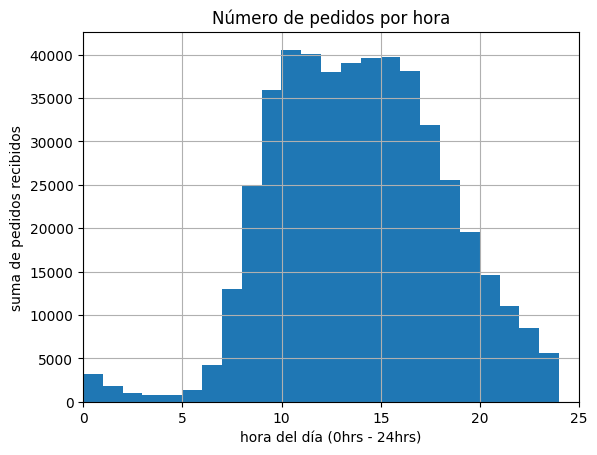


order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: count, dtype: int64


In [ ]:
from matplotlib import pyplot as plt
df_orders['order_hour_of_day'].hist(bins=[0,0.99, 1.99, 2.99, 3.99, 4.99, 5.99, 6.99,7.99,8.99,9.99,10.99,11.99,12.99,13.99,14.99,15.99,16.99,17.99,18.99,19.99,20.99,21.99,22.99,23.99])
plt.title("Número de pedidos por hora")
plt.xlabel("hora del día (0hrs - 24hrs)")
plt.ylabel("suma de pedidos recibidos")
plt.xlim(0,25)
plt.show()
print()
print( df_orders['order_hour_of_day'].value_counts().sort_index())


OBSERVACIONES:

Llegan muy pocos pedidos en la madrugada. A partir de las 7am se incrementa el volúmen alcanzando un máximo entre las 10am y 11am.

### [A3] ¿Qué día de la semana compran víveres las personas?

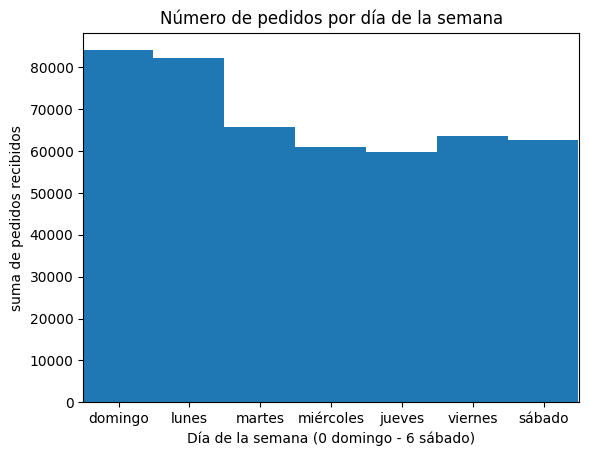


order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: count, dtype: int64


In [ ]:
df_orders['order_dow'].hist(bins=[0,0.99, 1.99, 2.99, 3.99, 4.99, 5.99, 6.99])
plt.title("Número de pedidos por día de la semana")
plt.xlabel("Día de la semana (0 domingo - 6 sábado)")
plt.ylabel("suma de pedidos recibidos")
plt.xlim(0,7)
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5],['domingo','lunes','martes','miércoles','jueves','viernes','sábado'])
plt.grid(False)
plt.show()
print()
print( df_orders['order_dow'].value_counts().sort_index())

OBSERVACIONES:

Los días domingo y lunes son los de mayor volúmen para recibir pedidos, con volúmen arriba de 80,000. El resto de los días de la semana se mantiene con un volúmen cercano a 60,000.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido?

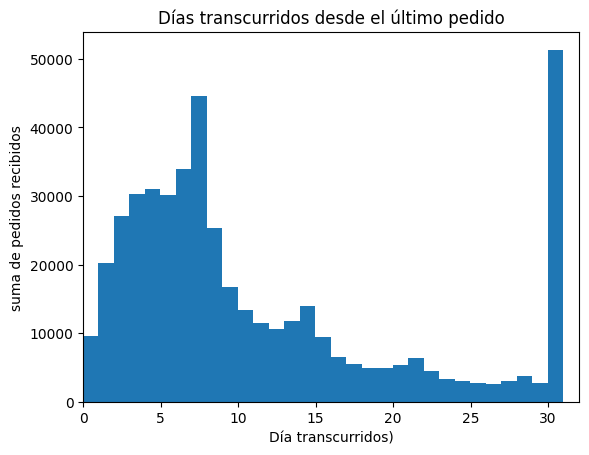


Número mínimo observado de días transcurridos desde el último pedido: 0.0
Número máximo observado de días transcurridos desde el último pedido: 30.0

days_since_prior_order
0.0      9589
1.0     20179
2.0     27138
3.0     30224
4.0     31006
5.0     30096
6.0     33930
7.0     44577
8.0     25361
9.0     16753
10.0    13309
11.0    11467
12.0    10658
13.0    11737
14.0    13992
15.0     9416
16.0     6587
17.0     5498
18.0     4971
19.0     4939
20.0     5302
21.0     6448
22.0     4514
23.0     3337
24.0     3015
25.0     2711
26.0     2640
27.0     2986
28.0     3745
29.0     2673
30.0    51337
Name: count, dtype: int64


In [ ]:


df_orders['days_since_prior_order'].hist(bins=[0,0.99, 1.99, 2.99, 3.99, 4.99, 5.99, 6.99,7.99,8.99,9.99,10.99,11.99,12.99,13.99,14.99,15.99,16.99,17.99,18.99,19.99,20.99,21.99,22.99,23.99,24.99,25.99,26.99,27.99,28.99,29.99,30.99])
plt.title("Días transcurridos desde el último pedido")
plt.xlabel("Día transcurridos)")
plt.ylabel("suma de pedidos recibidos")
plt.xlim(0,32)
plt.grid(False)
plt.show()
print()
print("Número mínimo observado de días transcurridos desde el último pedido:",df_orders['days_since_prior_order'].min())
print("Número máximo observado de días transcurridos desde el último pedido:",df_orders['days_since_prior_order'].max())
print()
print( df_orders['days_since_prior_order'].value_counts().sort_index())

OBSERVACIONES:

Hay un marcada tendencia a que pasen 7 días antes de realizarse el siguiente pedido. Esto tiene lógica por la gente que tiene una rutina de hacer su pedido en un día de la semana.

También hay una marcada tendencia a que pasen 30 días antes de realizarse el siguiente pedido. Esto puede explicarse de dos formas: (1) gente que tiene rutina de hacer su pedido mensualmente, o bien (2) que pasados mas de 30 días ya no se haga el recuento de días transcurridos correctamente dejando el valor default como 30.

Llama la atención que cerca de 10,000 clientes no esperaron ni un día para hacer su siguiente pedido.

## 3.B. Análisis de variables complejas

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`.

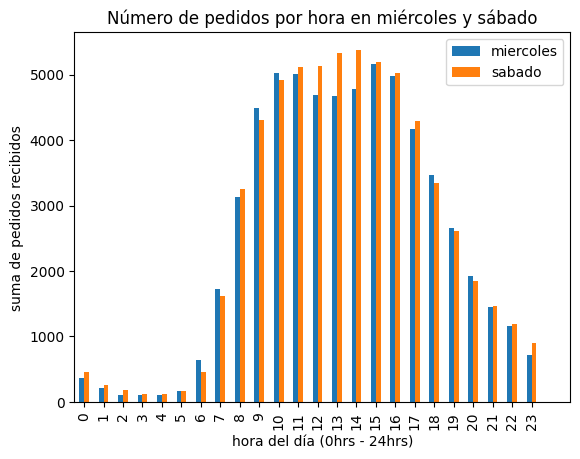

                   miercoles  sabado
order_hour_of_day                   
0                        373     464
1                        215     254
2                        106     177
3                        101     125
4                        108     118
5                        170     161
6                        643     451
7                       1732    1619
8                       3125    3246
9                       4490    4311
10                      5026    4919
11                      5004    5116
12                      4688    5132
13                      4674    5323
14                      4774    5375
15                      5163    5188
16                      4976    5029
17                      4175    4295
18                      3463    3338
19                      2652    2610
20                      1917    1847
21                      1450    1473
22                      1154    1185
23                       718     893


In [ ]:
df_miercoles=df_orders[df_orders['order_dow']==3]
df_miercoles_por_hora=df_miercoles.groupby(by='order_hour_of_day')['order_id'].count()
df_sabado=df_orders[df_orders['order_dow']==6]
df_sabado_por_hora=df_sabado.groupby(by='order_hour_of_day')['order_id'].count()
df_combinado = pd.DataFrame({
    'miercoles': df_miercoles_por_hora,
    'sabado': df_sabado_por_hora
})
df_combinado.plot(kind='bar', stacked=False)
plt.title("Número de pedidos por hora en miércoles y sábado")
plt.xlabel("hora del día (0hrs - 24hrs)")
plt.ylabel("suma de pedidos recibidos")
plt.xlim(-0.5,25)
plt.show()
print(df_combinado)


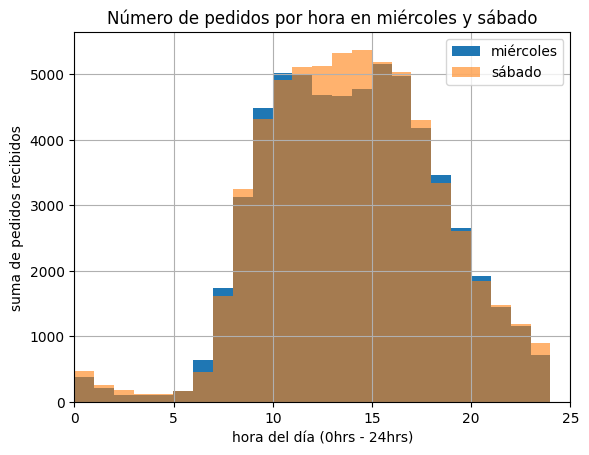

In [ ]:
# También se puede obtener el mismo resultado usando histograma
df_miercoles['order_hour_of_day'].hist(bins=[0,0.99, 1.99, 2.99, 3.99, 4.99, 5.99, 6.99,7.99,8.99,9.99,10.99,11.99,12.99,13.99,14.99,15.99,16.99,17.99,18.99,19.99,20.99,21.99,22.99,23.99])
df_sabado['order_hour_of_day'].hist(alpha=0.6,bins=[0,0.99, 1.99, 2.99, 3.99, 4.99, 5.99, 6.99,7.99,8.99,9.99,10.99,11.99,12.99,13.99,14.99,15.99,16.99,17.99,18.99,19.99,20.99,21.99,22.99,23.99])
plt.title("Número de pedidos por hora en miércoles y sábado")
plt.xlabel("hora del día (0hrs - 24hrs)")
plt.ylabel("suma de pedidos recibidos")
plt.xlim(0,25)
plt.legend(['miércoles','sábado'])
plt.show()


OBSERVACIONES:

La distribución de pedidos recibidos en días miércoles y sábado son muy similares. En el caso de miércoles se observa un periodo de 3 horas de las 12:00 a las 15:00, donde hay una marcada baja de ordenes. Pudiera ser que en este periodo se presentó algún problema con el sistema, u otro motivo.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

Número mínimo de pedidos por cliente: 1
Número máximo de pedidos por cliente: 28


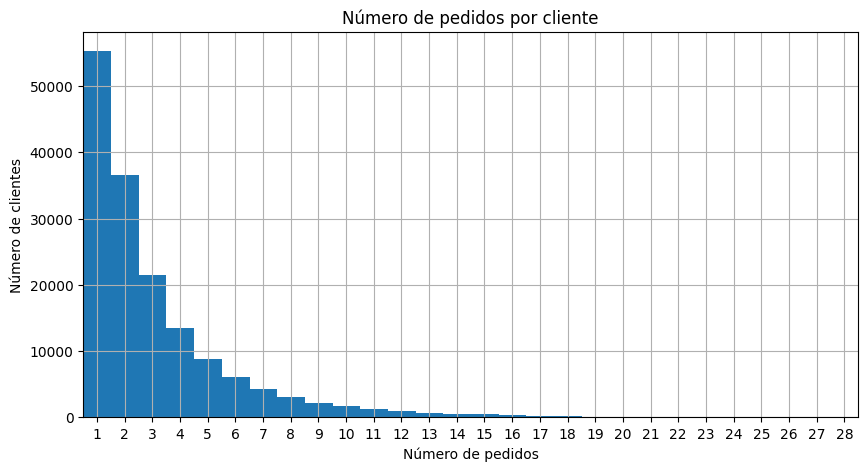

order_id
1     55357
2     36508
3     21547
4     13498
5      8777
6      6012
7      4240
8      3019
9      2152
10     1645
11     1308
12      947
13      703
14      512
15      437
16      263
17      184
18      121
19       85
20       52
21       22
22       23
23       19
24        3
25        1
26        1
28        1
Name: count, dtype: int64


In [ ]:
#Graficar la distribución para el número de órdenes que hacen los clientes
#(es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...)
df_pedidos_por_cliente=df_orders.groupby(by='user_id')['order_id'].count()
df_pedidos_por_cliente.hist(figsize= [10,5],bins=[0.01, 1.01, 2.01, 3.01, 4.01, 5.01, 6.01,7.01,8.01,9.01,10.01,11.01,12.01,13.01,14.01,15.01,16.01,17.01,18.01,19.01,20.01,21.01,22.01,23.01,24.01,25.01,26.01,27.01,28.01,29.01,30.01])
plt.title("Número de pedidos por cliente")
plt.xlabel("Número de pedidos")
plt.ylabel("Número de clientes")
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,16.5,17.5,18.5,19.5,20.5,21.5,22.5,23.5,24.5,25.5,26.5,27.5],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28])
plt.xlim(0,28)
plt.grid(True)
#plt.figsize[10,5]
print("Número mínimo de pedidos por cliente:",df_pedidos_por_cliente.min())
print("Número máximo de pedidos por cliente:",df_pedidos_por_cliente.max())
plt.show()
print(df_pedidos_por_cliente.value_counts().sort_index())


OBSERVACIONES:

La distribución es exponencial decreciente. Siendo 1 pedido por cliente el caso mas frecuente con 55,357. De ahí se reduce drásticamente la frecuencia a medida que aumenta el número de pedidos. El cliente con mayor número de pedidos es 28.

### [B3] ¿Cuáles son los 20 productos más populares (ID y nombre)?

In [ ]:
#primero vamos a usar merge() para crear un dataframe que incluya todos los datos que necesitamos.
df_order_products_details = df_order_products.merge(df_products, on='product_id', how='left')
print(df_order_products_details.head(10))

   order_id  product_id  add_to_cart_order  reordered  \
0   2141543       11440                 17          0   
1    567889        1560                  1          1   
2   2261212       26683                  1          1   
3    491251        8670                 35          1   
4   2571142        1940                  5          1   
5   2456893       21616                  4          1   
6    644579       12341                  5          1   
7   2231852       44925                 10          1   
8   3185766       36259                 14          1   
9    420019       23315                  4          1   

                                        product_name  aisle_id  department_id  
0                     Chicken Breast Tenders Breaded       129              1  
1                                         Bag Of Ice        37              1  
2  Cafe Latte Pure Lightly Sweetened Iced Coffee ...        91             16  
3                                     Diced Tomatoes

In [ ]:

#luego vamos a agrupar los datos por product_id, contando cuantas veces se pide cada producto, y conservando el dato de product_name.
#adicionalmente conservaremos los datos aisle_id y department_id que podríamos necesitar mas adelante.

frecuencia_productos=df_order_products_details.groupby(by='product_id').agg({'product_name': 'first','aisle_id': 'first','department_id': 'first','product_id': 'count'})
print(frecuencia_productos.head(20))

                                                 product_name  aisle_id  \
product_id                                                                
1                                  Chocolate Sandwich Cookies        61   
2                                            All-Seasons Salt       104   
3                        Robust Golden Unsweetened Oolong Tea        94   
4           Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
7                              Pure Coconut Water With Orange        98   
8                           Cut Russet Potatoes Steam N' Mash       116   
9                           Light Strawberry Blueberry Yogurt       120   
10             Sparkling Orange Juice & Prickly Pear Beverage       115   
11                                          Peach Mango Juice        31   
12                                 Chocolate Fudge Layer Cake       119   
13                                          Saline Nasal Mist        11   
14                       

In [ ]:
#finalmente ajustaremos los títulos de columnas para reconocerlos correctamente y mostraremos los 20 productos mas frecuentemente solicitados
frecuencia_productos.columns =   ['product_name','aisle_id','department_id','order_count']     # Se ajusta el nombre de la columna 'product_id'  a 'order_count'
print(frecuencia_productos.sort_values(by='order_count',ascending=False).head(20))


                        product_name  aisle_id  department_id  order_count
product_id                                                                
24852                         Banana        24              4        66050
13176         Bag of Organic Bananas        24              4        53297
21137           Organic Strawberries        24              4        37039
21903           Organic Baby Spinach       123              4        33971
47209           Organic Hass Avocado        24              4        29773
47766                Organic Avocado        24              4        24689
47626                    Large Lemon        24              4        21495
16797                   Strawberries        24              4        20018
26209                          Limes        24              4        19690
27845             Organic Whole Milk        84             16        19600
27966            Organic Raspberries       123              4        19197
22935           Organic Y

OBSERVACIONES:

Les gustan mucho las Bananas. Son los dos productos más solicitados. El campo order_count muestra el número de ordenes en las cuales se incluyó la compra de cada producto.

## 3.C. Análisis de sobre aspectos críticos

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [ ]:
#Tomando en cuenta que en la tabla df_order_products cada registro representa un artículo pedido, entonces el número de artículos
#que viene en cada pedido, se obtiene al contar cuantas veces se presenta el mismo valor order_id en este dataframe.
articulos_por_pedido=df_order_products.groupby(by='order_id').agg({'product_id': 'count'})
articulos_por_pedido.columns =   ['acum_articulos_por_pedido']
print(articulos_por_pedido.sort_values('acum_articulos_por_pedido',ascending=False).head())

          acum_articulos_por_pedido
order_id                           
61355                           127
3308010                         115
2136777                         108
171934                          104
1959075                          98


In [ ]:
#confirmamos que efectivamente el pedido 61355 tiene 127 artículos
print(df_order_products[df_order_products['order_id']==61355].sort_values(by='add_to_cart_order'))

         order_id  product_id  add_to_cart_order  reordered
2897193     61355       47209                  1          0
2652936     61355       34270                  2          1
2187266     61355       41363                  3          0
1628680     61355       28420                  4          1
269840      61355       14233                  5          0
...           ...         ...                ...        ...
3816634     61355       25659                999          0
4063159     61355        1087                999          0
4164200     61355        9484                999          0
4126014     61355       12440                999          0
4268097     61355       40709                999          0

[127 rows x 4 columns]


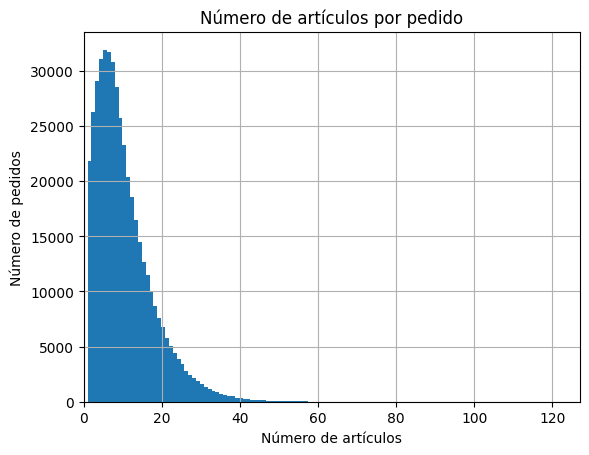

In [ ]:
# trazamos la gráfica para obtener la distribución. usamos bins=127 porque sabemos que es el máximo de artículos en un pedido
articulos_por_pedido.hist(bins=127)
plt.title("Número de artículos por pedido")
plt.xlabel("Número de artículos")
plt.ylabel("Número de pedidos")
plt.xlim(0,127)
plt.show()


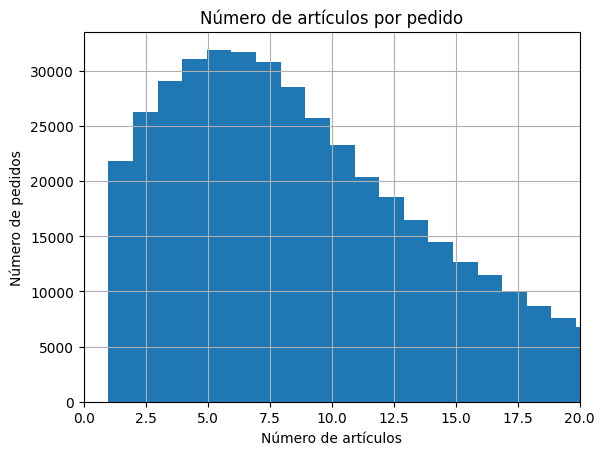

acum_articulos_por_pedido
1                            21847
2                            26292
3                            29046
4                            31054
5                            31923
6                            31698
7                            30822
8                            28539
9                            25742
10                           23248
11                           20406
12                           18539
13                           16497
14                           14472
15                           12696
16                           11465
17                           10002
18                            8726
19                            7612
20                            6771
Name: count, dtype: int64


In [ ]:
#trazamos una nueva gráfica con zoom en el eje x en el rango 0 a 20 para entender mejor el comportamiento
articulos_por_pedido.hist(bins=127)
plt.title("Número de artículos por pedido")
plt.xlabel("Número de artículos")
plt.ylabel("Número de pedidos")
plt.xlim(0,20)
plt.show()
print(articulos_por_pedido.value_counts().sort_index().head(20))


OBSERVACIONES:

El pedido mas grande fue de 127 artículos, sin embargo esto no es algo que se presente de forma común.

La gran mayoría de pedidos tienen menos de 20 artículos. El pedido mas común es de 5 artículos, con 31923 casos observados.

La distribución parece ser chi cuadrada.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia?

In [ ]:
# ANALISIS PRELIMINAR
# Para entender mejor los datos, primero vamos a resolver la pregunta:
#     ¿En df_order_products hay registros que coincidan en tener el mismo order_id y product_id?
# Creemos que esto podría ser posible. Si se repite "n" veces, el product_id 456, para el order_id 123,
#     ello sería indicativo de que se compraron "n" articulos del tipo 456, dentro del pedido 123

print("Registros duplicados en df_order_products tomando en cuenta los campos order_id y product_id : ", pd.concat([ col1,col2] ,axis='columns').duplicated().sum() )

#
# Se confirma que no hay 2 registros que tengan el mismo order_id y product_id. Por lo tanto se concluye que:
#  (1) dentro de cada order_id, sólamente se tiene 1 registro para cada product_id,
#  (2) en la información que nos dieron, sólo se menciona si un artículo se incluye en un pedido,
#      pero no nos dicen la cantidad comprada de dicho artículo, todo hace suponer en la información
#      que nos entregaron falta un campo donde nos digan la cantidad que se compró de cada producto en cada pedido.
#
# Nota aclaratoria:Dadas las circunstancias del caso, se realizará el análisis de 'frecuencia' solicitado, sin tomar en cuenta la
#                  cantidad que se solicitó de cada artículo en cada pedido. Se limitará el análilsis a revisar artículos pedidos
#                  vs no pedidos en cada pedido (sin importar cuantos artículos se solicitaron)

Registros duplicados en df_order_products tomando en cuenta los campos order_id y product_id :  0


In [ ]:
# Necesitamos combinar frecuencia de productos adquiridos con sus nombres. Por lo tanto vamos a volver a usar la tabla que antes hicimos df_order_products_details
# Para obtener los que "vuelven a pedirse", debemos descartar en df_order_products_details los registros que se
# pidieron por vez primera. Es decir descartando los registros que tienen valor 'reordered'=0
df_order_products_reordered=df_order_products_details[df_order_products_details['reordered']==1]
print(df_order_products_reordered.head())

   order_id  product_id  add_to_cart_order  reordered  \
1    567889        1560                  1          1   
2   2261212       26683                  1          1   
3    491251        8670                 35          1   
4   2571142        1940                  5          1   
5   2456893       21616                  4          1   

                                        product_name  aisle_id  department_id  
1                                         Bag Of Ice        37              1  
2  Cafe Latte Pure Lightly Sweetened Iced Coffee ...        91             16  
3                                     Diced Tomatoes        81             15  
4                        Organic 2% Reduced Fat Milk        84             16  
5                               Organic Baby Arugula       123              4  


In [ ]:
# Ahora debemos agrupar por producto y obtener la frecuencia
# Usaremos .agg para aplicar distintos criterios de acumulación en los campos order_id, add_to_cart_order, etc.
frecuencia_productos_reordered=df_order_products_reordered.groupby(by='product_id').agg({'order_id': 'first','product_id': 'count','add_to_cart_order': 'last','reordered': 'first','product_name':'first', 'aisle_id':'first','department_id':'first'})
print("Tabla de todos los productos que se han comprado, con el número de órdenes en que se han inclído")
print(frecuencia_productos_reordered.head())
# Ahora debemos ajustar los nombres de las columnas para reconocer las que son valores agrupados o valores de ejemplo.
frecuencia_productos_reordered.columns =   ['order_id_example','order_count_solo_reorder','add_to_cart_order_last','reordered_first', 'product_name','aisle_id','department_id']     # Se ajusta el nombre de la columna 'product_id'  a 'acum_product'
print()
print("Tabla de todos los productos que se han comprado, con el número de órdenes en que se han inclído, ajustando nombre de columnas")
print(frecuencia_productos_reordered.head())

Tabla de todos los productos que se han comprado, con el número de órdenes en que se han inclído
            order_id  product_id  add_to_cart_order  reordered  \
product_id                                                       
1            1104373         158                  8          1   
3            2851416          31                  7          1   
4            1339754          25                  7          1   
7            1806224           1                  6          1   
8            2292930           6                  4          1   

                                                 product_name  aisle_id  \
product_id                                                                
1                                  Chocolate Sandwich Cookies        61   
3                        Robust Golden Unsweetened Oolong Tea        94   
4           Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
7                              Pure Coconut Water With Orange    

In [ ]:
# Ahora debemos mostrar el resultado de los 20 artículoos  mas solicitado con sus nombres y número de artículo
print(frecuencia_productos_reordered[['product_name','order_count_solo_reorder']].sort_values(by='order_count_solo_reorder',ascending=False).head(20))

                        product_name  order_count_solo_reorder
product_id                                                    
24852                         Banana                     55763
13176         Bag of Organic Bananas                     44450
21137           Organic Strawberries                     28639
21903           Organic Baby Spinach                     26233
47209           Organic Hass Avocado                     23629
47766                Organic Avocado                     18743
27845             Organic Whole Milk                     16251
47626                    Large Lemon                     15044
27966            Organic Raspberries                     14748
16797                   Strawberries                     13945
26209                          Limes                     13327
22935           Organic Yellow Onion                     11145
24964                 Organic Garlic                     10411
45007               Organic Zucchini                   

OBSERVACIONES:

Despues de haber descartado los pedidos de artículos que los usuarios compran por vez primera, las bananas siguen siendo los artículos que se incluyen con mayor regularidad dentro de una orden.

Esto no siginifica que sea el artículo mas vendido. Esa conclusión sólo la podríamos dar si se hubiera incluído dentro de la información el dato de unidades_vendidas.

Llama la atención que el top 20 de artículos que vuelven a pedirse con mayor frecuencia incluye sólo productos frescos y la mayor parte de ellos del tipo orgánico. Esta claro que nuestra calidad y catálogo de productos es una ventaja competitiva.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [ ]:
#Calculamos la proporción de reorden de cada producto, agrupando los productos y sacando el promedio del campo 'reordered'
prop_prods_reordenados=df_order_products.groupby(by='product_id').agg({'reordered': 'mean'}).reset_index()
# Agreguemos nombres de productos a la tabla
prop_prods_reordenados = prop_prods_reordenados.merge(df_products, on='product_id', how='left')
# Conservamos las columnas relevantes. Borramos las columnas aisle_id y department_id
prop_prods_reordenados = prop_prods_reordenados[['product_id','product_name','reordered']]
# Ordenamos la tabla para mostrar los productos que tienen mayor proporción de reorden
prop_prods_reordenados = prop_prods_reordenados.sort_values(by='reordered',ascending=False)
# Ajustamos nombres de columnas para que resulten mas claras
prop_prods_reordenados.columns =   ['product_id','product_name','proporcion_productos_reordenados']


       index  product_id                                       product_name  \
0        266         295      Chewables Extra Strength Cherry Creme - 48 CT   
1      45018       49088  Natural Body & Foot Powder with Tea Tree Oil &...   
2      45019       49089                          Gluten-Free Soup Crackers   
3        289         324  Strong & Kind Roasted Jalapeno Almond Protein Bar   
4      31900       34787                        Flat Anchovies in Olive Oil   
...      ...         ...                                                ...   
45568  32861       35834                           Bulgarian Organic Yogurt   
45569  32921       35897                                           Ham Hock   
45570  40998       44743                                     Real Zero Cola   
45571  41002       44747                        Frozen Organic Blackberries   
45572   7463        8189              2% Milk Reduced Fat Colby Jack Cheese   

       proporcion_productos_reordenados  
0        

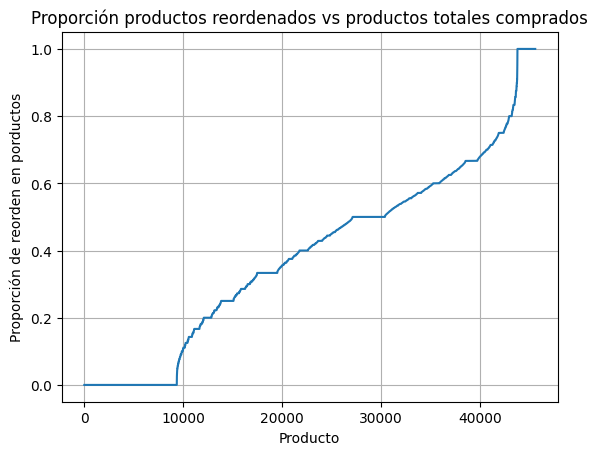

In [ ]:
# Presentamos la tabla de resultados
print("Ejemplos al azar de productos")
print(prop_prods_reordenados.sample(10))
print()
print("Productos con mayor proporción de reorden")
print(prop_prods_reordenados.head(10))

# Graficamos para poder interpretar los resultados
# Antes, ordenamos los datos
prop_prods_reordenados = prop_prods_reordenados.sort_values(by='proporcion_productos_reordenados').reset_index()
print(prop_prods_reordenados)

prop_prods_reordenados['proporcion_productos_reordenados'].plot()
plt.title("Proporción productos reordenados vs productos totales comprados")
plt.xlabel("Producto")
plt.ylabel("Proporción de reorden en porductos")
plt.grid(True)
plt.show()


OBSERVACIONES:

Vemos muchos productos que se reordenan al 0% lo cual puede significar que no se han pedido en lo absoluto o bien que sólo se pidieron por primera vez (reordered=0). Tendríamos que investigar mas profundamente el tema para analizar la conveniencia de impulsar la venta de productos que el cliente no conoce o que tal vez tengan un precio no competitivo.
También vemos otros productos tienen por resultado 100%, estos productos son los mas ganadores sin duda.   
También vemos otros productos que se piden en algún porcentaje de recompra mayor a 0% y menor a 100%

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [ ]:
# usamos merge para agregar el user_id a la tabla de order_products. El campo llave es order_id
order_products_por_usuario= df_order_products.merge(df_orders, on='order_id', how='left')

# Ahora conservamos las columnas que necesitamos: product_id, user_id, reordered
order_products_por_usuario = order_products_por_usuario[['user_id','product_id','reordered']]
# Ahora agrupamos por cliente y obtenemos el promedio en el campo reordered
order_products_por_usuario = order_products_por_usuario.groupby(by='user_id').agg({'reordered': 'mean'}).reset_index()
# Ajustamos nombres de columnas para que resulten mas claras
order_products_por_usuario.columns =   ['user_id','proporcion_productos_reordenados']



         index  user_id  proporcion_productos_reordenados
0       115784   159721                               0.0
1        95704   132132                               0.0
2        11838    16243                               0.0
3        11833    16237                               0.0
4       139684   192599                               0.0
...        ...      ...                               ...
149621   60057    82878                               1.0
149622   15996    22030                               1.0
149623   15998    22032                               1.0
149624      65       88                               1.0
149625   81358   112123                               1.0

[149626 rows x 3 columns]


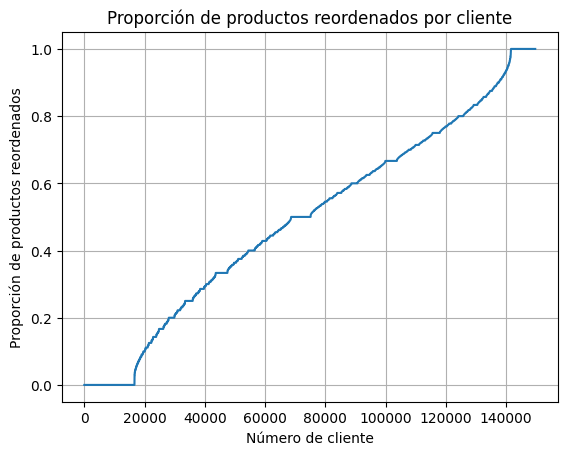

In [ ]:
# Presentamos la tabla con resultados
print()
print(order_products_por_usuario.head(20))


# Graficamos para poder interpretar los resultados
# Antes, ordenamos los datos
order_products_por_usuario = order_products_por_usuario.sort_values(by='proporcion_productos_reordenados').reset_index()
print(order_products_por_usuario)

order_products_por_usuario['proporcion_productos_reordenados'].plot()
plt.title("Proporción de productos reordenados por cliente")
plt.xlabel("Clientes")
plt.ylabel("Proporción de productos reordenados")
plt.grid(True)
plt.show()




OBSERVACIONES:

Vemos un número imortante de clientes con proporción 0% (poco menos de 20,000 clientes). Esto debe investigarse con mas detalle. Pueden ser usuarios nuevos que apenas compraron sus primeros productos y por eso tienen todos sus productos con reordered=0, o bien puede tratarse de clientes que ya no compraron ningún producto y deberíamos intentar reconquistar y revisar si hubo algún problema.

Para el resto de los clientes, vemos que se distribuyen uniformemente los porcentajes de reorden.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [ ]:
# MI ANALISIS DE COMO RESOLVERLO
# Primero tendríamos que aislar los productos que los clientes pusieron primero en sus carros usando la df_order_products, con 'add_to_cart_order'= 1.
# Luego tendríamos que hacer el recuento de product_id para identificar los que tienen mayor frecuencia, y ordenarlos de mayor a menor frecuencia.


In [ ]:
 # aislar los productos que los clientes pusieron primero en sus carros usando la df_order_products, con 'add_to_cart_order'= 1.
 df_solicitados_primero = df_order_products[df_order_products['add_to_cart_order']==1].reset_index()
 print(df_solicitados_primero.head(5))
 print()
 print(type(df_solicitados_primero))

#


   index  order_id  product_id  add_to_cart_order  reordered
0      1    567889        1560                  1          1
1      2   2261212       26683                  1          1
2     14   1961225       37553                  1          1
3     16    639939       10017                  1          1
4     23    750040        8518                  1          0

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Hacer el recuento de product_id para identificar los que tienen mayor frecuencia, y ordenarlos de mayor a menor frecuencia.
df_sol_prim = df_solicitados_primero.groupby(by='product_id').agg({'add_to_cart_order': 'count'})
df_sol_prim.columns =   ['primer_producto_en_el_cart_frecuencia']
df_sol_prim.sort_values(by='primer_producto_en_el_cart_frecuencia',ascending=False,inplace=True)
df_sol_prim=df_sol_prim.merge(df_products, on='product_id', how='left')
print(df_sol_prim.head(20))

    product_id  primer_producto_en_el_cart_frecuencia  \
0        24852                                  15562   
1        13176                                  11026   
2        27845                                   4363   
3        21137                                   3946   
4        47209                                   3390   
5        21903                                   3336   
6        47766                                   3044   
7        19660                                   2336   
8        16797                                   2308   
9        27966                                   2024   
10       44632                                   1914   
11       49235                                   1797   
12       47626                                   1737   
13         196                                   1733   
14       38689                                   1397   
15       26209                                   1370   
16       12341                 

OBSERVACIONES:

Las Bananas son el artículo que primero ponen los clientes en sus carritos de compra. En 15,562 ordenes fué el primer producto que se puso en el carrito. Coincide que las Bananas también son el artículo mas comprado.

La lista de los artículos que mas frecuentemente se ponen al principio en el carrito de compras es de productos frescos y en su mayoría orgánicos.

### Conclusion general del proyecto:

Los pedidos estan concentrados entre las 9 y las 16hrs. Pudiera ser un cuello de botella a analizar. De confirmarse que se trata de un cuello de botella podría analizarse la opción de dar descuento en horarios fuera de este periodo.

No hay mucha diferencia en el número de pedidos que se tienen en los distintos días de la semana.

Llama la atención que cerca de 10,000 clientes no esperaron ni un día para hacer su siguiente pedido. Todo indica que una vez realizado su pedido, se dieron cuenta que se les había ovidado solicitar algún artículo. Sería bueno analizar estos casos con mas detenimiento para que el mensajero sólo haga un viaje a la casa del cliente (consolidar los pedidos)

Llama la atención que el número máximo de diás transcurridos desde el último pedido sea 30 días. Todo indica que pasado este tiempo ya no se incrementa el contador. Esto es un tema analizar, puesto que esta variable es muy relevante para identificar clientes que deajaron de usar el servicio, y debería detonar llamadas o promociones para averiguar el motivo y recuperar a clientes.

El pedido mas común es de 5 artículos, con 31923 casos observados. Esto nos habla de que muchos clientes usan el servicio para pedir productos ocasionales, suponemos que el "super grande" lo hacen físicamente en una tienda.

Llama la atención que el top 20 de artículos que vuelven a pedirse con mayor frecuencia incluye sólo productos frescos y la mayor parte de ellos del tipo orgánico. Este tipo de artículos también son los primeros que el cliente pone en su carrito de compras. Esta claro que nuestra calidad y catálogo de productos frescos (en particular orgánicos) es una ventaja competitiva.


Fue un reto interesante utilizar las herramientas que aprendimos de Pandas para este proyecto.

